# **Muhammad Andika Pratama**
# **19/441139/SV/16491**

# Step 1: Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Step 2: Load Dataset

1. Disini menggunakan dataset mnist dari keras yang berisi gambar gambar angka berbentuk tulisan tangan
2. selanjutnya dataset tersebut dikelompokkan ke variabel data train dan data test

In [ ]:
handwritten_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = handwritten_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


3. lihat ukuran dari data train dan data test, disini data train selalu lebih banyak dari data test

Train: images=(60000, 28, 28), labels=(60000,)
Test: images=(10000, 28, 28), labels=(10000,)


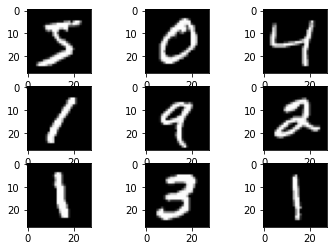

In [ ]:
print('Train: images=%s, labels=%s' % (train_images.shape, train_labels.shape))
print('Test: images=%s, labels=%s' % (test_images.shape, test_labels.shape))

# plot 9 gambar pertama 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

# Step 3: Preprocessing

Tahap preprocessing dilakukan dengan,
1. mengubah ukuran dari data menjadi (1 x 4)
2. selanjutnya data dinormalisasi dengan membagi 255 sehingga data mempunyai rentang nilai dari 0 hingga 1. ini berfungsi untuk memudahkan saat melakukan training dan testing

In [ ]:
training = train_images
x_train = training.reshape([-1,28,28,1])
x_train = x_train/255 # Normalisasi supaya data mempunyai rentang 0-1
y_train = train_labels

testing = test_images
x_test = testing.reshape([-1,28,28,1])
x_test = x_test/255 # Normalisasi supaya data mempunyai rentang 0-1
y_test = test_labels

  3. data train kemudian di split atau dibagi secara random sehingga menghasilkan 1 data lagi yaitu data untuk validasi atau validattion data

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=5)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


# Step 4: Modelling and Training

1. buat model convolutional neural network.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dropout(rate=0.2))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))

2. compile model tersebut dengan menggunakan optimizer Adam
3. tampilkan report/summary dari hasil compile tersebut

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout_1 (Dropout)         (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                        

4. latih data train ke model yang telah dibuat sebelumnya dengan epoch 30

In [ ]:
EPOCHS = 30 
history = model.fit(x=x_train, y=y_train, batch_size=512, epochs=EPOCHS, validation_data=(x_val,y_val))

Epoch 1/30
94/94 [==============================] - 11s 23ms/step - loss: 0.4414 - accuracy: 0.8597 - val_loss: 0.1711 - val_accuracy: 0.9494
Epoch 2/30
94/94 [==============================] - 2s 17ms/step - loss: 0.1697 - accuracy: 0.9484 - val_loss: 0.1040 - val_accuracy: 0.9697
Epoch 3/30
94/94 [==============================] - 2s 17ms/step - loss: 0.1156 - accuracy: 0.9654 - val_loss: 0.0791 - val_accuracy: 0.9760
Epoch 4/30
94/94 [==============================] - 2s 17ms/step - loss: 0.0921 - accuracy: 0.9717 - val_loss: 0.0678 - val_accuracy: 0.9795
Epoch 5/30
94/94 [==============================] - 2s 17ms/step - loss: 0.0746 - accuracy: 0.9773 - val_loss: 0.0578 - val_accuracy: 0.9830
Epoch 6/30
94/94 [==============================] - 2s 19ms/step - loss: 0.0660 - accuracy: 0.9789 - val_loss: 0.0529 - val_accuracy: 0.9832
Epoch 7/30
94/94 [==============================] - 2s 19ms/step - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 8/30
9

5. Berikut tampilan grafik untuk melihat performa akurasi model

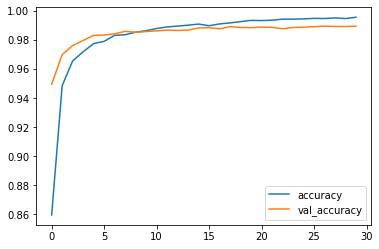

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

5. Berikut tampilan grafik untuk melihat performa loss dari model

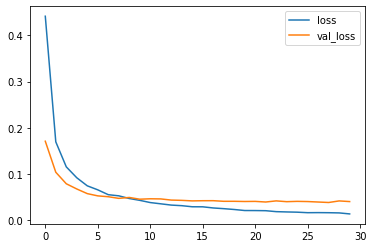

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

# Step 5: Evaluate Model

Selanjutnya ditampilkan performa model yang telah di latih dengan menampilkan akurasi model secara keseluruhan. Disini didapatkan akurasinya yaitu sebesar 0.988

In [ ]:
eval_result = model.evaluate(x_test, y_test)
print("Accuracy : {:.3f}".format(eval_result[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0414 - accuracy: 0.9881
Accuracy : 0.988


# Step 6: Testing

1. Model yang telah dilatih dengan menggunakan data train sebelumnya akan dicek performanya dengan menggunakan data test
2. Visualisasikan hasil prediksi dari data test dengan plot confussion matrix

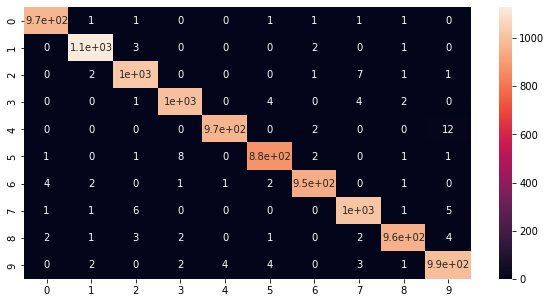

In [ ]:
y_pred = model.predict(x=x_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

# Step 7: Report

Terakhir ditampilkan report untuk mengetahui data hasil prediksi seperti presisi, recall, skor f-1, dan support.

Disini didapatkan dengan menggunakan model yang telah di latih sebelumnya menghasilkan akurasi sebesar 0.99 pada seluruh data test yang diberikan. 

Dan hasil testing menunjukkan bahwa hasil prediksi yang paling sesuai adalah pada class 1 karena memiliki nilai support yang terbesar

In [ ]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       980
     class 1       0.99      0.99      0.99      1135
     class 2       0.99      0.99      0.99      1032
     class 3       0.99      0.99      0.99      1010
     class 4       0.99      0.99      0.99       982
     class 5       0.99      0.98      0.99       892
     class 6       0.99      0.99      0.99       958
     class 7       0.98      0.99      0.98      1028
     class 8       0.99      0.98      0.99       974
     class 9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

